In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [34]:
import time

import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as Image

image_filename = 'datasets/CF_simulation/real_image/test_gs/hdt5_0010.tif'
image_filename = 'datasets/CF_simulation/real_image/test_gs/hdt_0146.tif'
#image_filename = 'datasets/CF_simulation/real_image/test_gs/2.tif'

from utils.fft import *

0.076000
0.102000


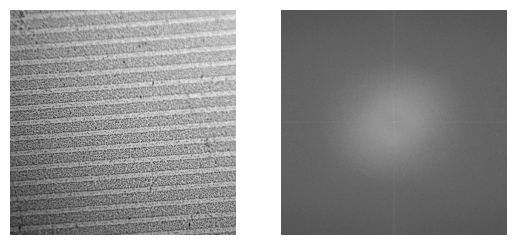

<Figure size 640x480 with 0 Axes>

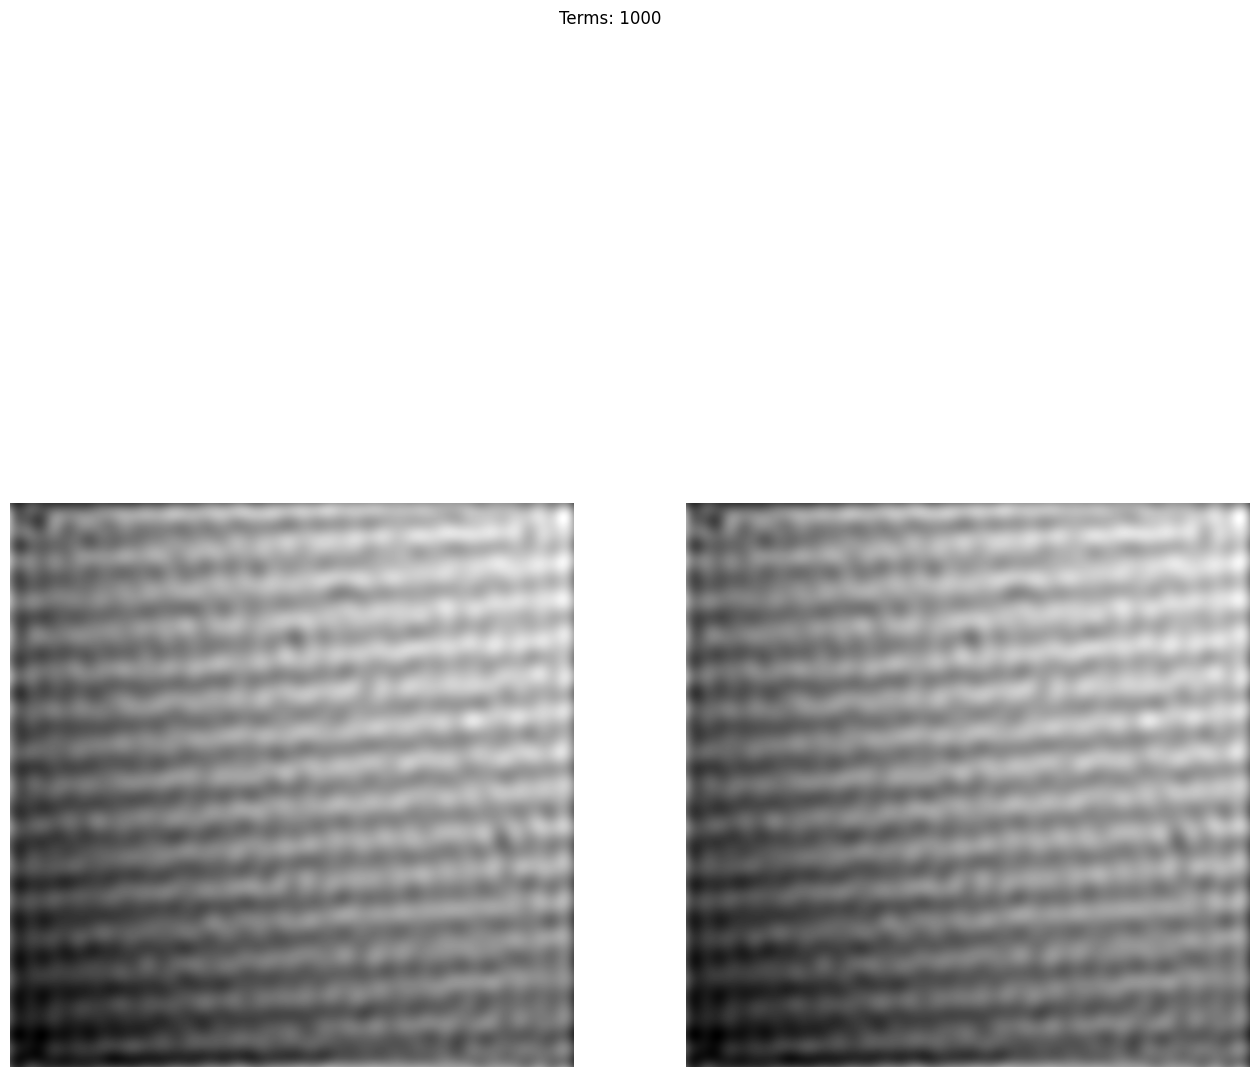

In [39]:
# Read and process image

image = Image.open(image_filename)
image = image.convert('L')  # Convert to grayscale
longest_side = (max(image.size)//2)*2 + 1
image = image.resize((longest_side, longest_side))
image=np.array(image)

# Array dimensions (array is square) and centre pixel
# Use smallest of the dimensions and ensure it's odd
#array_size = min(image.shape) - 1 + min(image.shape) % 2
# Crop image so it's a square image
#image = image[:array_size, :array_size]
side_length = len(image)
centre = int((side_length - 1) / 2)
coords_left_half = get_coords_left_half(image_array=image)
plt.set_cmap("gray")
time_start = time.time_ns()
ft = calculate_2dft(image)
print("{:.6f}".format((time.time_ns()-time_start)/1e9))

# computation time of inverse fft
time_start = time.time_ns()
calculate_2dift(ft)
print("{:.6f}".format((time.time_ns()-time_start)/1e9))

# Show grayscale image and its Fourier transform
plt.subplot(121)
plt.imshow(image)
plt.axis("off")
plt.subplot(122)
plt.imshow(np.log(abs(ft)))
plt.axis("off")
# Reconstruct image
fig = plt.figure()
# Step 1
# Set up empty arrays for final image and
# individual gratings
until=1000
result_img = calculate_2dift(ft, until=until)
#Image.fromarray(result_img).show()
display_plots(result_img, result_img, until)
plt.show()